# Trending YouTube Video Engagement: A Global Analysis

In [210]:
import os
import pandas as pd
import altair as alt
import json

In [211]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data Loading

In [212]:
!pip install kagglehub

#### Data Source - https://www.kaggle.com/datasets/datasnaek/youtube-new/data

In [213]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

Path to dataset files: /Users/avadhootkulkarni/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115


In [214]:
ls /Users/avadhootkulkarni/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115

CA_category_id.json  GBvideos.csv         MX_category_id.json
CAvideos.csv         IN_category_id.json  MXvideos.csv
DE_category_id.json  INvideos.csv         RU_category_id.json
DEvideos.csv         JP_category_id.json  RUvideos.csv
FR_category_id.json  JPvideos.csv         US_category_id.json
FRvideos.csv         KR_category_id.json  USvideos.csv
GB_category_id.json  KRvideos.csv


### Combining all country datasets

In [215]:
# List of CSV and JSON pairs for each country
countries_files = [
    ('Canada', 'CAvideos.csv', 'CA_category_id.json'),
    ('Great Britain', 'GBvideos.csv', 'GB_category_id.json'),
    # ('Mexico', 'MXvideos.csv', 'MX_category_id.json'),
    ('India', 'INvideos.csv', 'IN_category_id.json'),
    ('Germany', 'DEvideos.csv', 'DE_category_id.json'),
    # ('Russia', 'RUvideos.csv', 'RU_category_id.json'),
    # ('Japan', 'JPvideos.csv', 'JP_category_id.json'),
    ('France', 'FRvideos.csv', 'FR_category_id.json'),
    # ('South Korea', 'KRvideos.csv', 'KR_category_id.json'),
    ('USA', 'USvideos.csv', 'US_category_id.json')
]

In [216]:
# empty list to store DataFrames
all_data = []

# Loop through list of countries and files
for country, csv_file, json_file in countries_files:
    # Load the CSV file
    csv_path = os.path.join(path, csv_file)
    df = pd.read_csv(csv_path, header=0)

    # Mapping category ID with corresponding category name
    
    # Load the JSON file
    json_path = os.path.join(path, json_file)
    with open(json_path, 'r') as file:
        category_data = json.load(file)
    
    # Normalize the JSON data
    categories = pd.json_normalize(category_data['items'])
    categories = categories[['id', 'snippet.title']]
    categories.columns = ['category_id', 'category_name']
    categories['category_id'] = categories['category_id'].astype(int)
    
    # Merge the CSV data with category data
    df = df.merge(categories, on='category_id', how='left')
    
    # Add a column for the country
    df['country'] = country
    
    # Append the DataFrame for this country to the list
    all_data.append(df)

In [217]:
# Concatenate all the country dataframes into a single dataframe
final_df = pd.concat(all_data, axis=0, ignore_index=True)
final_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,Canada


## Data Description

In [218]:
print(final_df.shape)

(239662, 18)


In [219]:
print(final_df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'country'],
      dtype='object')


### Definitions of Columns and Data Types

- **video_id** (`object`): The unique identifier for the video.
- **trending_date** (`object`): The date the video was trending.
- **title** (`object`): The title of the video.
- **channel_title** (`object`): The name of the channel.
- **category_id** (`int64`): The ID of the category the video belongs to.
- **publish_time** (`object`): The publication time of the video.
- **tags** (`object`): Tags added to the video.
- **views** (`int64`): The number of times the video has been viewed.
- **likes** (`int64`): The number of likes the video has received.
- **dislikes** (`int64`): The number of dislikes the video has received.
- **comment_count** (`int64`): The number of comments on the video.
- **thumbnail_link** (`object`): The link to the video's thumbnail image.
- **comments_disabled** (`bool`): Whether comments are disabled for the video (`True/False`).
- **ratings_disabled** (`bool`): Whether ratings are disabled for the video (`True/False`).
- **video_error_or_removed** (`bool`): Whether the video has an error or has been removed (`True/False`).
- **description** (`object`): The description of the video.
- **category_name** (`object`): The name of the category the video belongs to.
- **country** (`object`): The country where the video was trending.

In [220]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239662 entries, 0 to 239661
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                239662 non-null  object
 1   trending_date           239662 non-null  object
 2   title                   239662 non-null  object
 3   channel_title           239662 non-null  object
 4   category_id             239662 non-null  int64 
 5   publish_time            239662 non-null  object
 6   tags                    239662 non-null  object
 7   views                   239662 non-null  int64 
 8   likes                   239662 non-null  int64 
 9   dislikes                239662 non-null  int64 
 10  comment_count           239662 non-null  int64 
 11  thumbnail_link          239662 non-null  object
 12  comments_disabled       239662 non-null  bool  
 13  ratings_disabled        239662 non-null  bool  
 14  video_error_or_removed  239662 non-n

In [221]:
# check for missing values
print(final_df.isnull().sum())

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               7503
category_name              639
country                      0
dtype: int64


In [222]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## Data Cleaning

In [223]:
# Fill missing values in category name column
final_df['category_name'] = final_df['category_name'].fillna('Unknown')

In [224]:
# ensuring date columns are in proper format
final_df['publish_time'] = pd.to_datetime(final_df['publish_time'])
final_df['trending_date'] = pd.to_datetime(final_df['trending_date'], format='%y.%d.%m')

In [225]:
final_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,Canada
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Canada
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Canada
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Canada
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,Canada


## Heatmap of Categories vs. Time with Views

In [226]:
# Extract the month-year from publish_time
final_df['publish_month'] = final_df['publish_time'].dt.to_period('M').astype(str)
final_df.head()

/var/folders/kl/x5ks55mx6lb86rd13fmcqb0c0000gn/T/ipykernel_69423/2562933774.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country,publish_month
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,Canada,2017-11
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Canada,2017-11
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Canada,2017-11
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Canada,2017-11
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,Canada,2017-11


In [227]:
# List of unique countries in the dataset
countries = final_df['country'].unique()
print(countries)
print(len(countries))

['Canada' 'Great Britain' 'India' 'Germany' 'France' 'USA']
6


In [228]:
schemes = ['blues', 'reds', 'greens', 'teals', 'purples', 'oranges']

# Function to create heatmap for each country
def create_heatmap_for_country(country, i):
    country_df = final_df[final_df['country'] == country]

    country_df = country_df[
        (country_df['publish_month'] >= '2017-09')
    ]

    # Group by category and publish month, summing the views
    heatmap_data = country_df.groupby(['category_name', 'publish_month'], as_index=False)['views'].sum()

    # Sort data by publish month
    heatmap_data = heatmap_data.sort_values('publish_month')

    # Creating the heatmap for the specific country
    heatmap = alt.Chart(heatmap_data).mark_rect().encode(
        x=alt.X('publish_month:O', title='Publish Month'),
        y=alt.Y('category_name:O', title='Category'),
        color=alt.Color('views:Q', scale=alt.Scale(scheme=schemes[i]), title='Total Views'),
        tooltip=['category_name', 'publish_month', 'views'],
    ).properties(
        title=f'Heatmap of Views by Category and Publish Month - {country}',
        width=310,
        height=300
    )
    
    return heatmap

In [229]:
heatmaps = []
for i, country in enumerate(countries):
    heatmaps.append(create_heatmap_for_country(country, i))

final_chart = alt.concat(*heatmaps, columns=2).resolve_scale(color='independent')

final_chart.show()

alt.ConcatChart(...)

## Time-Series Analysis of Views and Engagements

In [230]:
# clip older dates
new_df = final_df[final_df['publish_month'] >= '2017-09']
new_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country,publish_month
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,Canada,2017-11
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Canada,2017-11
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Canada,2017-11
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Canada,2017-11
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,Canada,2017-11


In [231]:
country_data = new_df.copy()

# Normalize the values using Min-Max scaling
normalized_data = country_data.copy()
metrics = ['views', 'likes', 'dislikes', 'comment_count']
for metric in metrics:
    min_val = normalized_data[metric].min()
    max_val = normalized_data[metric].max()
    normalized_data[metric] = (normalized_data[metric] - min_val) / (max_val - min_val)

normalized_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country,publish_month
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",0.040416,0.140265,0.022324,0.077394,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,Canada,2017-11
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",0.002389,0.022764,0.000868,0.008011,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Canada,2017-11
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",0.007517,0.026013,0.002745,0.005030,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Canada,2017-11
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",0.004936,0.023556,0.001023,0.010770,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Canada,2017-11
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",0.078964,0.291090,0.010839,0.052301,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,Canada,2017-11


In [232]:
# Aggregate the data by country and publish_month
df_country = normalized_data.groupby(['country', 'publish_month']).agg(
    total_views=('views', 'sum'),
    total_likes=('likes', 'sum'),
    total_dislikes=('dislikes', 'sum'),
    total_comments=('comment_count', 'sum'),
).reset_index()

df_country.head()

,country,publish_month,total_views,total_likes,total_dislikes,total_comments
0,Canada,2017-09,0.017711,0.034722,0.001772,0.004850
1,Canada,2017-10,0.051551,0.082585,0.019983,0.054438
2,Canada,2017-11,11.295653,30.882270,4.272230,13.454966
3,Canada,2017-12,17.415637,48.344319,10.862905,22.062164
4,Canada,2018-01,13.217078,36.256574,5.539798,17.481764


In [233]:
countries = df_country['country'].unique()

# list to store charts
charts = []

for country in countries:
    country_data = df_country[df_country['country'] == country]
    
    melted_data = pd.melt(
        country_data,
        id_vars=['publish_month'],
        value_vars=['total_views', 'total_likes', 'total_dislikes', 'total_comments'],
        var_name='metric',
        value_name='value'
    )
    
    country_chart = alt.Chart(melted_data).mark_line().encode(
        x=alt.X('publish_month:T', title='Publish Month'),
        y=alt.Y('value:Q', title='Normalized Metrics', scale=alt.Scale(zero=False)),
        color=alt.Color('metric:N', 
            scale=alt.Scale(
                domain=['total_views', 'total_likes', 'total_dislikes', 'total_comments'],
                range=['blue', 'green', 'red', 'purple']
            ),
            legend=alt.Legend(
                title='Metrics',
                orient='top-left',
                direction='vertical',
                symbolType='stroke',
                padding=10,
                offset=0
            )
        ),
        tooltip=['publish_month:T', 'metric:N', 'value:Q']
    ).properties(
        width=400,
        height=200,
        title=f"Metrics for {country}"
    )
    
    charts.append(country_chart)

grid_chart = alt.concat(*charts, columns=2).resolve_scale(
    y='shared'
).resolve_legend(
    color='independent'
)

grid_chart.show()

alt.ConcatChart(...)

## Interactive Bar Chart of Most Popular Channels

In [234]:
# clip older dates
new_df = final_df[final_df['publish_month'] >= '2017-09']
new_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country,publish_month
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,Canada,2017-11
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Canada,2017-11
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Canada,2017-11
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Canada,2017-11
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,Canada,2017-11


In [235]:
# relevant columns and aggregate by channel
channel_data = final_df.groupby(['channel_title', 'category_name']).agg(
    total_views=('views', 'sum'),
    total_likes=('likes', 'sum')
).reset_index()
channel_data.head()

,channel_title,category_name,total_views,total_likes
0,#AndresSTyle,People & Blogs,3014076,37423
1,#Débloqués,Entertainment,98209,1933
2,#Mentale Zuflucht,Entertainment,21804535,472886
3,#Mind Warehouse,Education,43941323,596114
4,#SeekingTheTruth,News & Politics,119011,3277


In [236]:
# Consider top 25 channels in each category
top_channels_per_category = channel_data.groupby('category_name').apply(
    lambda x: x.nlargest(25, 'total_views')
).reset_index(drop=True)

top_channels_per_category.head()

/var/folders/kl/x5ks55mx6lb86rd13fmcqb0c0000gn/T/ipykernel_69423/834619000.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,channel_title,category_name,total_views,total_likes
0,Ram Trucks,Autos & Vehicles,152245713,149349
1,Doug DeMuro,Autos & Vehicles,149612541,3516005
2,Jeep,Autos & Vehicles,130794102,175091
3,HvdH-Plane-Spotter,Autos & Vehicles,113997038,622075
4,HyundaiUSA,Autos & Vehicles,85032469,8154


In [237]:
# Dropdown for category selection
dropdown_category = alt.binding_select(
    options=top_channels_per_category['category_name'].unique(),
    name="Select Category: "
)
selection_category = alt.selection_point(fields=['category_name'], bind=dropdown_category, value='Autos & Vehicles')

In [238]:
# Bar chart for total views
views_chart = alt.Chart(top_channels_per_category).mark_bar().encode(
    x=alt.X('total_views:Q', title='Total Views'),
    y=alt.Y('channel_title:N', sort='-x', title='Channel'),
    color=alt.Color('category_name:N', title='Category'),
    tooltip=['channel_title:N', 'total_views:Q', 'total_likes:Q', 'category_name:N']
).add_params(
    selection_category
).transform_filter(
    selection_category
).properties(
    title="Most Popular Channels by Total Views",
    width=800,
    height=550
)

views_chart.show()

alt.Chart(...)

## Treemap for Category-wise Distribution of Views

In [239]:
import plotly.express as px

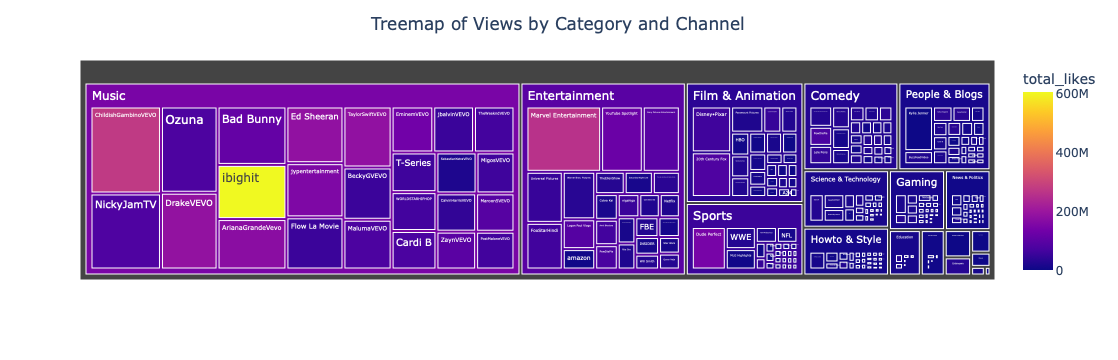

In [242]:
fig = px.treemap(top_channels_per_category, 
                 path=['category_name', 'channel_title'], 
                 values='total_views', 
                 color='total_likes', 
                 hover_data=['total_likes', 'total_views'])

fig.update_layout(
    title={
        "text": "Treemap of Views by Category and Channel",
        "x": 0.5,
        "xanchor": "center",
    }
)

fig.show()

## Box plot for views based on category

In [241]:
# box plot of total views by category
box_plot = alt.Chart(channel_data).mark_boxplot(outliers=True).encode(
    x=alt.X('category_name:N', title='Category', sort=None),
    y=alt.Y('total_views:Q', title='Total Views', scale=alt.Scale(type='log')),
    color='category_name:N', 
    tooltip=['category_name:N', 'total_views:Q', 'count():Q']
).properties(
    title="Box Plot of Total Views by Category",
    width=800,
    height=500
).configure_title(
    anchor='middle',
).configure_axis(
    grid=True
).configure_view(
    strokeWidth=0
)

box_plot.show()

alt.Chart(...)